Text(0.5,1,'growth curve of')

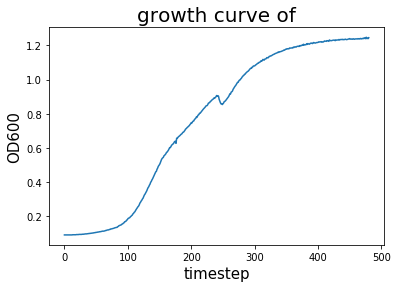

In [2]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib
#matplotlib.use("Agg") # this you need for new version of matplotlib to work
import matplotlib.pyplot as plt
from scipy.stats import stats
%matplotlib inline


#nr. of timesteps
nrows = 481

#to fix timesteps
time_step_seconds = 360 # steps between measurements
time_start_seconds = 310 # first measurement starts at 5 min and 10 s




#import excel file (file name, number of first rows to skip, number of rows to use, which cols to use)
df = pd.read_excel('Ilses_biotek_exp.xlsx', skiprows=30, nrows=nrows, usecols="B:CU")

#choosing well to work with
mfw = df.B5 #my favorite well

#new timesteps
seconds_since_start = np.arange(nrows)*time_step_seconds+time_start_seconds
time_since_start = pd.to_timedelta(seconds_since_start, unit='s') # input unit
df['Time'] = time_since_start


#sets time as index
df.set_index('Time', inplace=True)

#plots a graph showing the growth curve
fig, ax = plt.subplots()
mfw.plot()
plt.xlabel(r'timestep', size=15)
plt.ylabel(r'OD600', size=15)
plt.title('growth curve of', size=20)



In [3]:
#saves the figure
#fig.savefig('c11.png')

##Fitting the data

#using log data
logmfw = np.log10(mfw)

#linear model for fitting
def modelmfw(x):
    return interceptmfw + slopemfw*x

# choose intervals
starts = list(range(0, nrows-70))
ends = list(range(70, nrows))
pairs = list(zip(starts, ends))


# choose best interval
results = np.zeros((5,len(pairs)))

for k,(i,j) in enumerate(pairs):
    results[:, k] = stats.linregress(seconds_since_start[i:j], logmfw[i:j])
    
#find best R-squared (best fit)
np.argmax(results[2,:])
startmfw, endmfw = pairs[np.argmax(results[2,:])]

print(startmfw)
print(endmfw)


83
153


Text(0.5,1,'growth curve of')

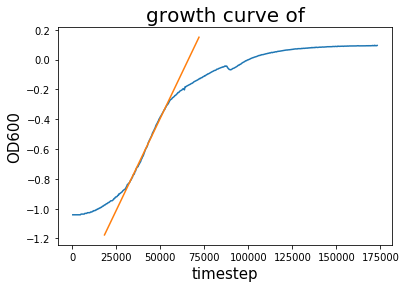

In [6]:
#Generating best fit
slopemfw, interceptmfw, rvaluemfw, pvaluemfw, stderrmfw = stats.linregress(seconds_since_start[startmfw:endmfw], logmfw[startmfw:endmfw])

#plotting best fit
fig, ax = plt.subplots()
plt.plot(seconds_since_start, logmfw)
plt.plot(seconds_since_start[50:200], modelmfw(seconds_since_start[50:200]))

#ax.set_yscale('log')
plt.xlabel(r'timestep', size=15)
plt.ylabel(r'OD600', size=15)
plt.title('growth curve of', size=20)

#saves the figure
#fig.savefig('mfw_fit.png')

In [13]:
mfw_input = input("Please enter your favorite well: ")

Please enter your favorite well: B4


In [14]:
print(mfw_input)

B4


In [22]:
dataB4 = df[mfw_input]

Time
0 days 00:05:10    0.086
0 days 00:11:10    0.086
0 days 00:17:10    0.086
0 days 00:23:10    0.085
0 days 00:29:10    0.085
0 days 00:35:10    0.085
0 days 00:41:10    0.085
0 days 00:47:10    0.086
0 days 00:53:10    0.086
0 days 00:59:10    0.085
0 days 01:05:10    0.085
0 days 01:11:10    0.086
0 days 01:17:10    0.085
0 days 01:23:10    0.085
0 days 01:29:10    0.086
0 days 01:35:10    0.086
0 days 01:41:10    0.086
0 days 01:47:10    0.086
0 days 01:53:10    0.086
0 days 01:59:10    0.086
0 days 02:05:10    0.086
0 days 02:11:10    0.086
0 days 02:17:10    0.086
0 days 02:23:10    0.087
0 days 02:29:10    0.087
0 days 02:35:10    0.087
0 days 02:41:10    0.087
0 days 02:47:10    0.087
0 days 02:53:10    0.087
0 days 02:59:10    0.088
                   ...  
1 days 21:11:10    1.221
1 days 21:17:10    1.220
1 days 21:23:10    1.225
1 days 21:29:10    1.224
1 days 21:35:10    1.223
1 days 21:41:10    1.224
1 days 21:47:10    1.220
1 days 21:53:10    1.225
1 days 21:59:10    1

In [23]:
getattr(df, mfw_input)

Time
0 days 00:05:10    0.086
0 days 00:11:10    0.086
0 days 00:17:10    0.086
0 days 00:23:10    0.085
0 days 00:29:10    0.085
0 days 00:35:10    0.085
0 days 00:41:10    0.085
0 days 00:47:10    0.086
0 days 00:53:10    0.086
0 days 00:59:10    0.085
0 days 01:05:10    0.085
0 days 01:11:10    0.086
0 days 01:17:10    0.085
0 days 01:23:10    0.085
0 days 01:29:10    0.086
0 days 01:35:10    0.086
0 days 01:41:10    0.086
0 days 01:47:10    0.086
0 days 01:53:10    0.086
0 days 01:59:10    0.086
0 days 02:05:10    0.086
0 days 02:11:10    0.086
0 days 02:17:10    0.086
0 days 02:23:10    0.087
0 days 02:29:10    0.087
0 days 02:35:10    0.087
0 days 02:41:10    0.087
0 days 02:47:10    0.087
0 days 02:53:10    0.087
0 days 02:59:10    0.088
                   ...  
1 days 21:11:10    1.221
1 days 21:17:10    1.220
1 days 21:23:10    1.225
1 days 21:29:10    1.224
1 days 21:35:10    1.223
1 days 21:41:10    1.224
1 days 21:47:10    1.220
1 days 21:53:10    1.225
1 days 21:59:10    1

Please enter your favorite well: D5
start fit: 106
end fit: 176


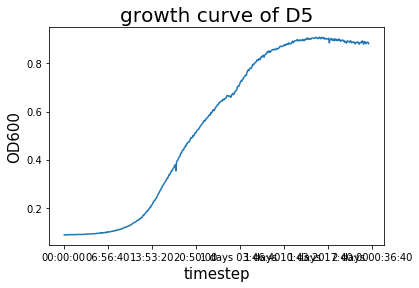

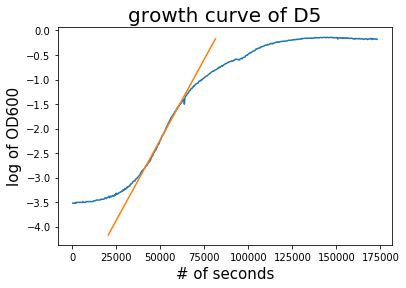

In [55]:
import numpy as np
import pandas as pd
from datetime import timedelta
# import matplotlib
# matplotlib.use("Agg") # this you need for new version of matplotlib to work
import matplotlib.pyplot as plt
from scipy.stats import stats
%matplotlib inline


#nr. of timesteps
nrows = 481

#to fix timesteps
time_step_seconds = 360 # steps between measurements
time_start_seconds = 310 # first measurement starts at 5 min and 10 s

#import excel file (file name, number of first rows to skip, number of rows to use, which cols to use)
df = pd.read_excel('Ilses_biotek_exp.xlsx', skiprows=30, nrows=nrows, usecols="B:CU")

#input
mfw_input = input("Please enter your favorite well: ")

#choosing well to work with
mfw = df[mfw_input] #my favorite well


#new timesteps
seconds_since_start = np.arange(nrows)*time_step_seconds+time_start_seconds
time_since_start = pd.to_timedelta(seconds_since_start, unit='s') # input unit
df['Time'] = time_since_start


#sets time as index
df.set_index('Time', inplace=True)

#plots a graph showing the growth curve
fig, ax = plt.subplots()
df[mfw_input].plot()
plt.xlabel(r'timestep', size=15)
plt.ylabel(r'OD600', size=15)
plt.title('growth curve of '+mfw_input, size=20)

#saves the figure
fig.savefig('plots/'+mfw_input+'.png')

##Fitting the data

#using log data
logmfw = np.log2(mfw)

#linear model for fitting
def modelmfw(x):
    return interceptmfw + slopemfw*x

# choose intervals
starts = list(range(0, nrows-70))
ends = list(range(70, nrows))
pairs = list(zip(starts, ends))


# choose best interval
results = np.zeros((5,len(pairs)))

for k,(i,j) in enumerate(pairs):
    results[:, k] = stats.linregress(seconds_since_start[i:j], logmfw[i:j])
    
#find best R-squared (best fit)
np.argmax(results[2,:])
startmfw, endmfw = pairs[np.argmax(results[2,:])]
print('start fit:', startmfw)
print('end fit:', endmfw)

#Generating best fit
slopemfw, interceptmfw, rvaluemfw, pvaluemfw, stderrmfw = stats.linregress(seconds_since_start[startmfw:endmfw], logmfw[startmfw:endmfw])

#plotting best fit
fig, ax = plt.subplots()
plt.plot(seconds_since_start, logmfw)
plt.plot(seconds_since_start[startmfw-50:endmfw+50], modelmfw(seconds_since_start[startmfw-50:endmfw+50]))

#ax.set_yscale('log')
plt.xlabel(r'# of seconds', size=15)
plt.ylabel(r'log of OD600', size=15)
plt.title('growth curve of '+mfw_input, size=20)

#saves the figure
fig.savefig('plots/'+mfw_input+'_fit.png')

In [56]:
doublingtime_insec = np.log(2)/slopemfw
doublingtime_inmin = doublingtime_insec/60
print('The doubling time of ',mfw_input, 'is:',doublingtime_inmin,'min')

The doubling time of  D5 is: 175.646479018 min


In [59]:
gr_min = slopemfw*60
print('The growth rate per min for',mfw_input, 'is:',gr_min)

The growth rate per min for D5 is: 0.00394626288232


In [80]:
f = open('output/'+mfw_input+'_output.txt', 'w+')

str_gr_min = str(gr_min)
str_dt = str(doublingtime_inmin)
f.write('The doubling time of '+mfw_input+' is: '+str_dt+' min. The growth rate per min for '+mfw_input+' is: '+str_gr_min)

98